In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food11-image-dataset/validation/Fried food/208.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/45.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/56.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/89.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/20.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/275.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/212.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/239.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/58.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/150.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/6.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/109.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/149.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/187.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/76.jpg
/kaggle/input/food11-image-datase

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical, plot_model

In [5]:
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


In [6]:
train_ds='/kaggle/input/food11-image-dataset/training'
val_ds='/kaggle/input/food11-image-dataset/validation'
test_ds='/kaggle/input/food11-image-dataset/evaluation'

In [7]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_ds,class_names=class_names,batch_size=32,image_size=(224,224))
val_ds=tf.keras.preprocessing.image_dataset_from_directory(val_ds,class_names=class_names,batch_size=32,image_size=(224,224))
test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_ds,class_names=class_names,batch_size=32,image_size=(224,224))

Found 9866 files belonging to 11 classes.
Found 3430 files belonging to 11 classes.
Found 3347 files belonging to 11 classes.


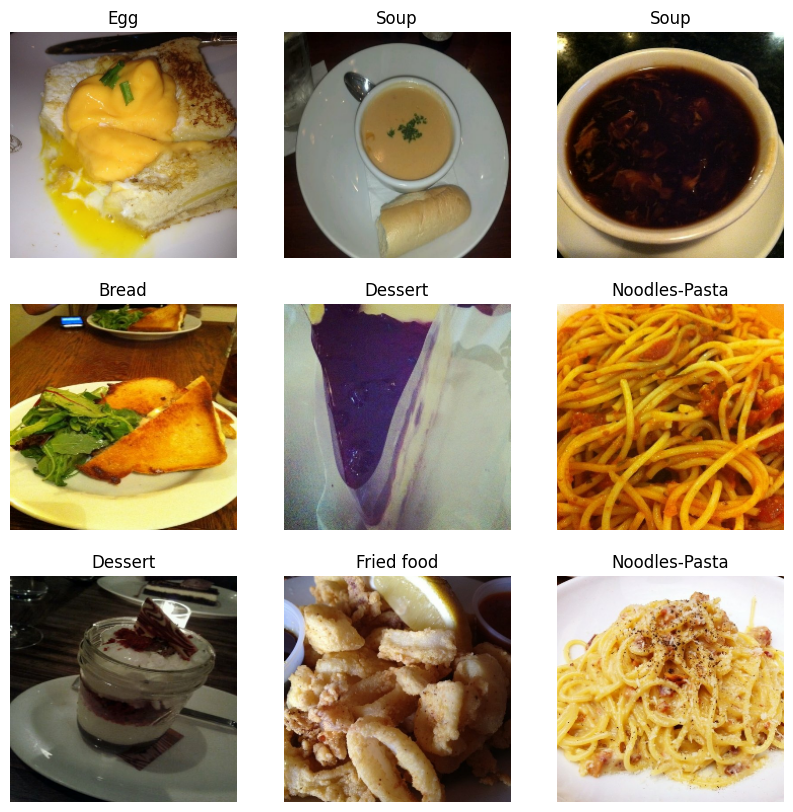

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


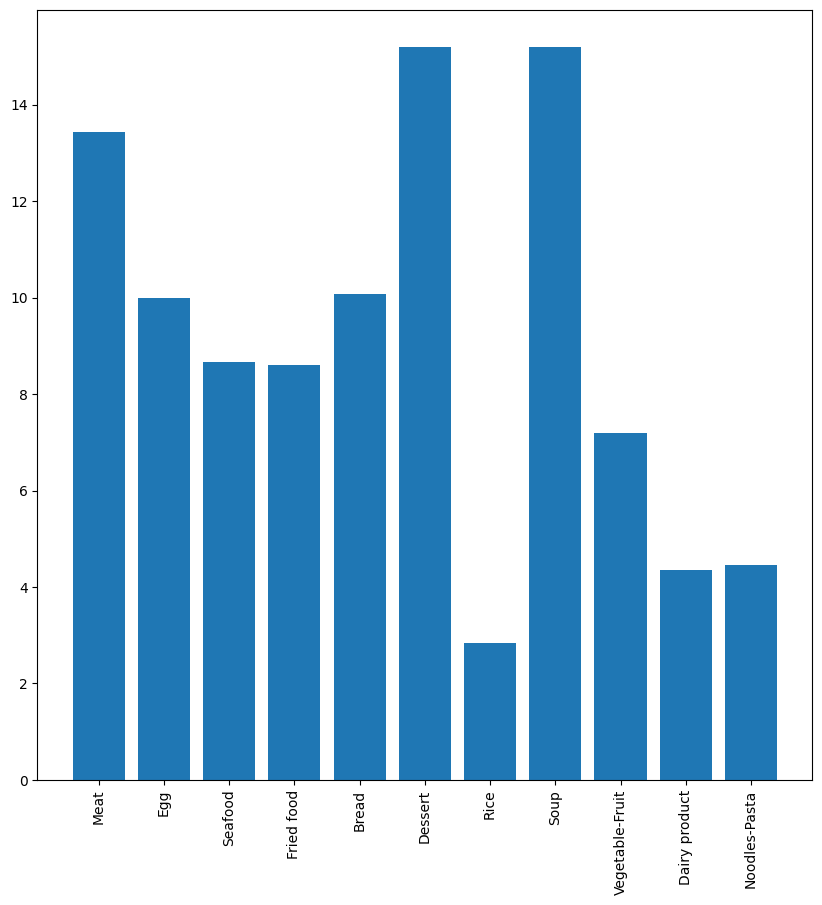

In [13]:
#plot the percentage of each class in the dataset
plt.figure(figsize=(10, 10))
class_count={}
for images, labels in train_ds:
    for i in range(len(labels)):
        if class_names[labels[i]] in class_count:
            class_count[class_names[labels[i]]]+=1
        else:
            class_count[class_names[labels[i]]]=1
class_count={key:val/sum(class_count.values())*100 for key,val in class_count.items
()}
plt.bar(class_count.keys(),class_count.values())
plt.xticks(rotation=90)
plt.show()


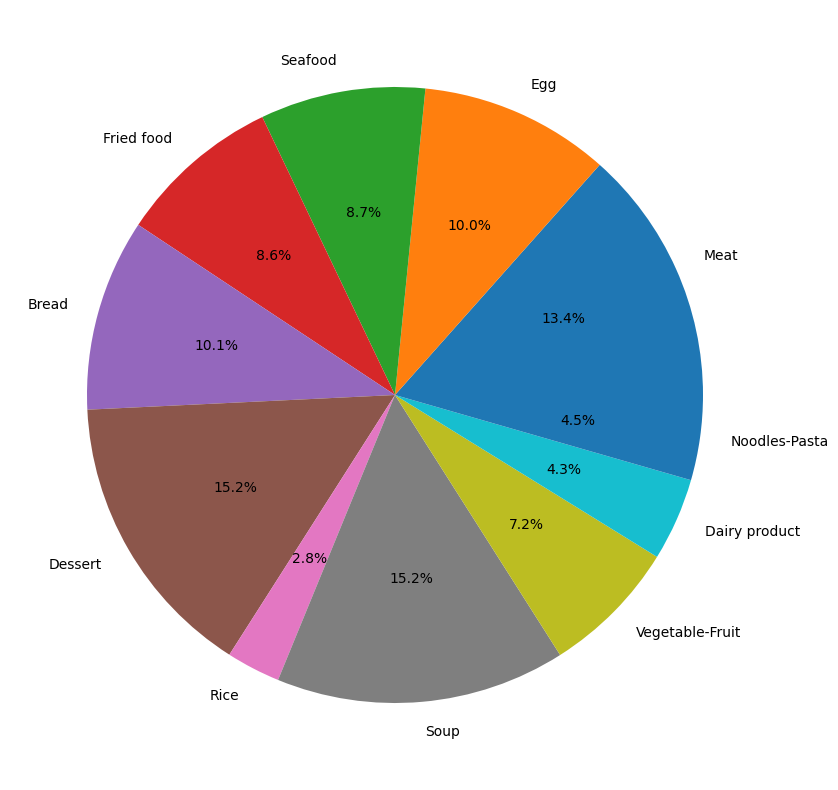

In [14]:
#plot in a pie chart
plt.figure(figsize=(10, 10))
plt.pie(class_count.values(),labels=class_count.keys(),autopct='%1.1f%%')
plt.show()

In [8]:
model=models.Sequential()

In [9]:
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


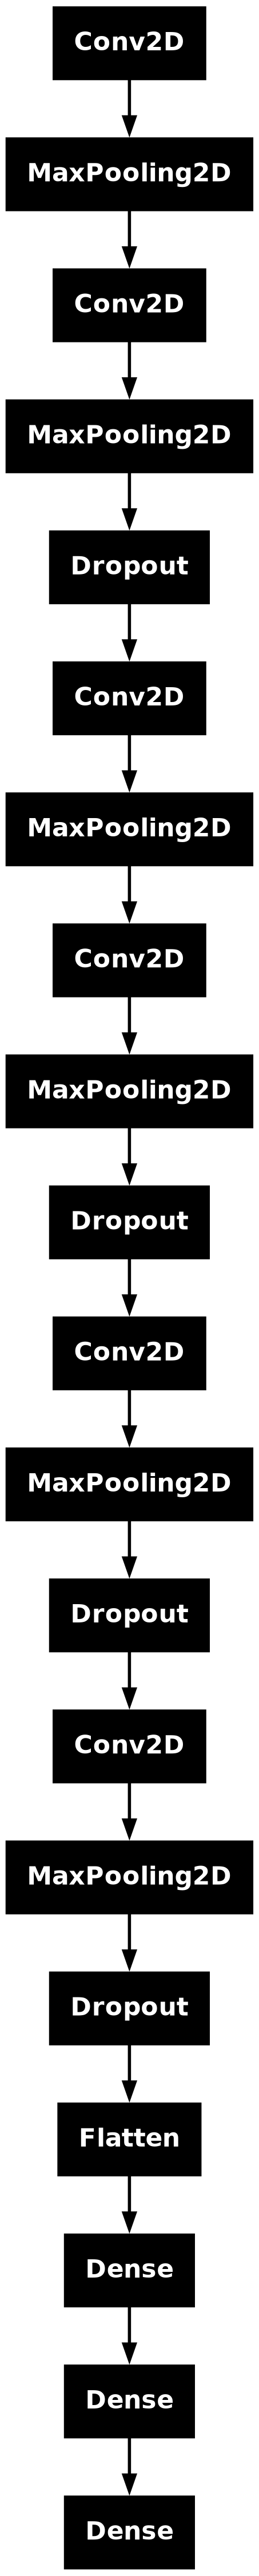

In [10]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(layers.Flatten(input_shape=(224,224)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(11,activation='softmax'))
plot_model(model)

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adamax(1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,112,971 (8.06 MB)

 Trainable params: 2,112,971 (8.06 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [13]:
tf.device('/device:GPU:0')

In [17]:
#use gpu
with tf.device('/device:GPU:0'):
    history=model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
  3/309 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.5677 - loss: 9.4025

W0000 00:00:1722179145.450177     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3387 - loss: 2.6486

W0000 00:00:1722179165.832344     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


309/309 ━━━━━━━━━━━━━━━━━━━━ 33s 79ms/step - accuracy: 0.3389 - loss: 2.6460 - val_accuracy: 0.4921 - val_loss: 1.5496
Epoch 2/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.5524 - loss: 1.2987 - val_accuracy: 0.5647 - val_loss: 1.3443
Epoch 3/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.6122 - loss: 1.1064 - val_accuracy: 0.5542 - val_loss: 1.3282
Epoch 4/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6613 - loss: 0.9838 - val_accuracy: 0.5700 - val_loss: 1.3308
Epoch 5/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6696 - loss: 0.9344 - val_accuracy: 0.5726 - val_loss: 1.3368
Epoch 6/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6872 - loss: 0.9058 - val_accuracy: 0.5525 - val_loss: 1.3672
Epoch 7/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6951 - loss: 0.8637 - val_accuracy: 0.5513 - val_loss: 1.3898
Epoch 8/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.7036 - loss: 0.8353 - val_accurac

In [ ]:
with tf.device('/device:GPU:0'):
    history=model.fit(train_ds,validation_data=val_ds,epochs=10)

In [ ]:
# Test
with tf.device('/GPU:0'): # using GPU
    model.evaluate(test_ds)

In [51]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

In [52]:
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

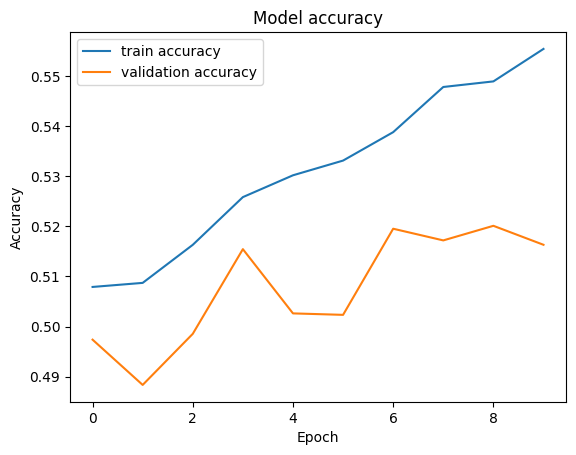

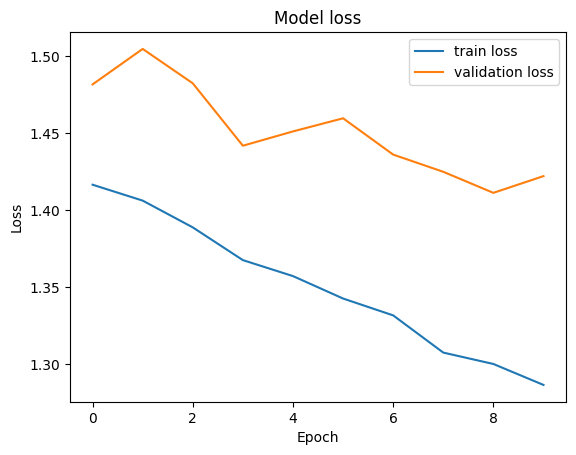

In [54]:
plot_accuracy(history)
plot_loss(history)

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/food11-image-dataset/evaluation',
    target_size=(225, 224),
    batch_size=32,
    class_mode='categorical')

Found 3347 images belonging to 11 classes.


In [64]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

preds=model.predict(test_generator)
y_pred = np.argmax(preds,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step
[[  0   0   0   0   0   0   0   0   0 368   0]
 [  0   0   0   0   0   0   0   0   0 148   0]
 [  0   0   0   0   0   0   0   0   0 500   0]
 [  0   0   0   0   0   0   0   0   0 335   0]
 [  0   0   0   0   0   0   0   0   0 287   0]
 [  0   0   0   0   0   0   0   0   0 432   0]
 [  0   0   0   0   0   0   0   0   0 147   0]
 [  0   0   0   0   0   0   0   0   0  96   0]
 [  0   0   0   0   0   0   0   0   0 303   0]
 [  0   0   0   0   0   0   0   0   0 500   0]
 [  0   0   0   0   0   0   0   0   0 231   0]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


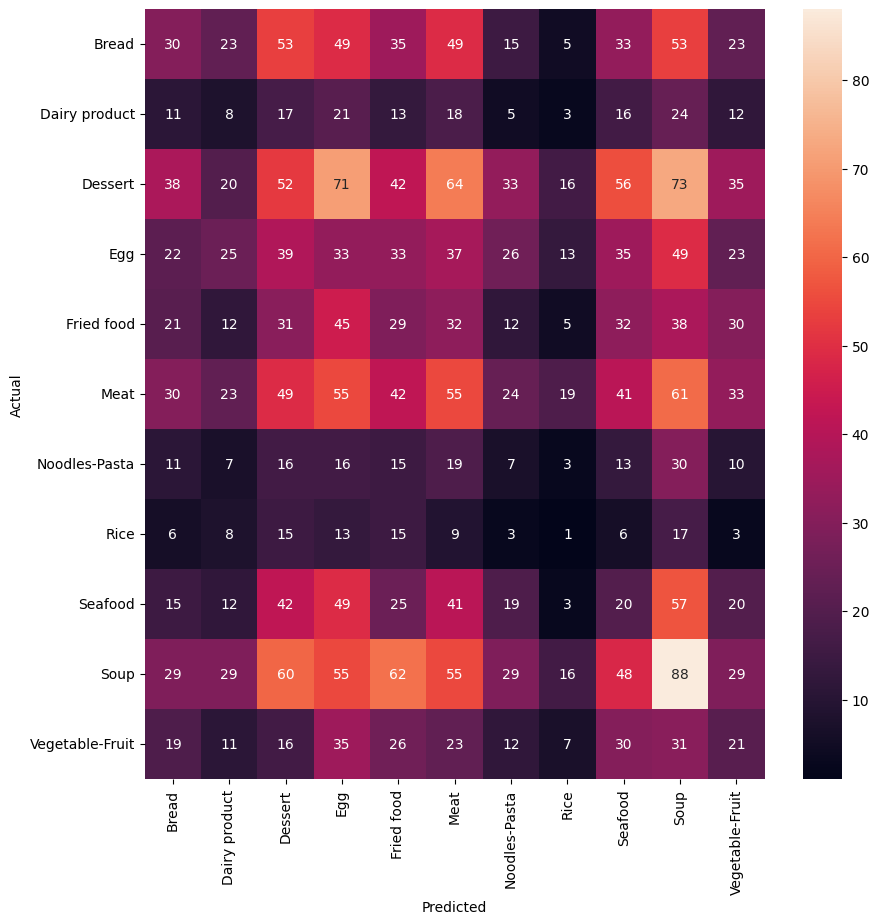

In [65]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plot it
plt.figure(figsize=(10,10))
predictions=model.predict(test_ds)
y_pred=np.argmax(predictions,axis=1)
y_test=[]
for images,labels in test_ds:
    for i in range(len(labels)):
        y_test.append(labels[i].numpy())
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
